# Sbmitted By Ankit Kumar IRM2016002

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
class Bayesian():
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.bag = {}
        self.spam_words = {}
        self.ham_words = {}
        self.spam = 0
        self.ham = 0
        self.pHam = 1
        self.pSpam = 1
        self.count_spam =0
        self.count_ham =0
        
    def bow(self):
       
        for i,msg in enumerate(self.X):
            for word in np.unique(msg.split()):
                self.bag[word] = self.bag.get(word,0)+1
                if(self.y[i]==labels['spam']):
                    self.count_spam+=1
                    self.spam_words[word] = self.spam_words.get(word,0)+1
                if (self.y[i]==labels['ham']):
                    self.count_ham+=1
                    self.ham_words[word] = self.ham_words.get(word,0)+1
        self.spam = np.count_nonzero(self.y==labels['spam'])
        self.ham = np.count_nonzero(self.y == labels['ham'])       
            
    def calc_prob(self):
        self.bow()
        self.pSpam = self.spam/(self.spam+self.ham+1)
        self.pHpam = self.ham/(self.spam+self.ham+1)
        
        self.p_w_spam = {}
        self.p_w_ham = {}
        for i,k in self.spam_words.items():
            if(i not in self.ham_words):
                self.p_w_spam[i] = 1
            else:
#                 self.p_w_spam[i] = k/(k+self.ham_words[i]) 
                self.p_w_spam[i] = k/(self.spam)
#                 self.p_w_spam[i] = k/(self.count_spam)
                
                
        
        for i,k in self.ham_words.items():
            if(i not in self.spam_words):
                self.p_w_ham[i] = 1
            else:
#                 self.p_w_ham[i] = k/(k+self.spam_words[i]) 
                self.p_w_ham[i] = k/(self.ham)
#                 self.p_w_ham[i] = k/(self.count_ham)
                
    
    def train(self):
        self.calc_prob()
        
    def predict(self,msg):
        msg = remove_redundant(msg)

        p_h=self.pHpam
        p_s=self.pSpam
        
        for x in msg.split():
            if self.bag.get(x,0)!=0:
                if(self.ham_words.get(x,0)!=0):
                    p_h *= self.p_w_ham[x]
                else:
                    p_h *= 0.01
                if(self.spam_words.get(x,0)!=0):
                        p_s *= self.p_w_spam[x]
                else:
                    p_s *= 0.01
        
        return (p_s*self.pSpam,p_h*self.pHam)
            
    def predict_spam(self,msg):
        a,b = self.predict(msg)
        return a/(a+b)
    
    def predict_ham(self,msg):
        a,b = self.predict(msg)
        return b/(a+b)
    
    def predict_label(self,msg):
        a = self.predict_spam(msg)
        b = self.predict_ham(msg)
        if(a>b):
            return labels['spam']
        else:
            return labels['ham']
        
    def predict_array(self,X_n):
        l = len(X_n)
        ans = np.zeros(l)
        for i in range(0,l):
            ans[i] = int(self.predict_label(X_n[i]))
        return ans
    
    def metrics(self,label, prediction):
        true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
        for i in range(len(label)):
            true_pos += int(label[i] == labels['spam'] and prediction[i] == labels['spam'])
            true_neg += int(label[i] == labels['ham'] and prediction[i] == labels['ham'])
            false_pos += int(label[i] == labels['ham'] and prediction[i] == labels['spam'])
            false_neg += int(label[i] == labels['spam'] and prediction[i] == labels['ham'])
        precision = true_pos / (true_pos + false_pos+1)
        recall = true_pos / (true_pos + false_neg+1)
        Fscore = 2 * precision * recall / (precision + recall+1)
        accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg+1)

        print("Precision: ", precision)
        print("Recall: ", recall)
        print("F-score: ", Fscore)
        print("Accuracy: ", accuracy)
        print(true_pos," ",true_neg," ",false_pos," ",false_neg)    
            
        

In [3]:
def plot_confusion_matrix(Y_pred,Y):
    cm = confusion_matrix(Y_pred, Y, labels=None, sample_weight=None)
    
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sns.set(font_scale = 1.4) #for label size
    ax = sns.heatmap(df_cm, annot = True, annot_kws = {"size": 16})
    ax.set_title("Confusion Matrix")
    ax.set(xlabel = 'Predicted Class', ylabel = 'Actual Class')
    plt.show()

    

## program starts from here

In [4]:
labels = {'spam' : 1,'ham' : 0}
data = pd.read_csv('spam_ham_data_set.csv',encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Read the csv

In [5]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis = 1);
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Preprocess the Data

In [6]:
data.rename(columns = {"v1":"cat","v2":"msg"},inplace = True)
data.head()

,cat,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## label the class

In [7]:
data.cat.replace(to_replace=['spam','ham'], value=[labels['spam'],labels['ham']],inplace=True)
data.head()

,cat,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Remove the duplicates from data

In [8]:
arr, indexes = np.unique(data[:]['msg'],return_index=True)
df_uniq = data.iloc[indexes,:]
df_uniq.head()

,cat,msg
4024,0,&lt;#&gt; in mca. But not conform.
3014,0,&lt;#&gt; mins but i had to stop somewhere f...
4264,0,&lt;DECIMAL&gt; m but its not a common car he...
2765,0,and picking them up from various points
3671,0,"came to look at the flat, seems ok, in his 50..."


## Function  to process the email string

In [9]:
def remove_redundant(string):
    t1 = string.replace('&gt','')
    t1 = t1.replace('&lt','')
    t1 = t1.lower()
    ans = ''.join(i for i in t1 if(i.isalnum() or i==' '))
    return ans.strip()

In [10]:
X = df_uniq['msg'].values;

for i, message in enumerate(X):
    X[i] = remove_redundant(message);

y = df_uniq['cat'].values;


In [11]:
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3)
print(len(X_train))
print(len(y_train))

(5169,)
(5169,)
3618
3618


## Define a model and train it

In [12]:
a = Bayesian(X_train,y_train)
%time a.train()


Wall time: 392 ms


## Predict the testing data previously un seen

In [13]:
predicted = a.predict_array(X_test)

## Calculate the metrics of measurement

In [14]:
a.metrics(y_test,predicted)

Precision:  0.945
Recall:  0.9
F-score:  0.5978910369068541
Accuracy:  0.9800257731958762
189   1332   10   20


## Prepare and plot the confusion matrix

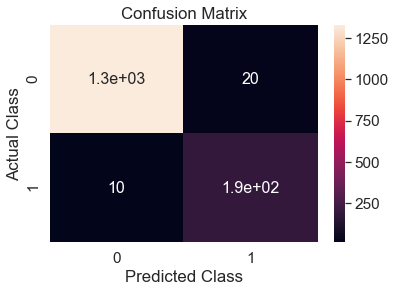

In [15]:
plot_confusion_matrix(predicted,y_test)